<a href="https://colab.research.google.com/github/manpriyad/Alt/blob/master/Missing_values_impute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imputing missing values using Logistic Regression and KNN 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt



In [2]:
df_old=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/titanic_train.csv')

In [3]:
df=df_old.copy()

In [4]:
df_med=df_old.copy()
df_med.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [6]:
median_age=df_med['Age'].median()

In [7]:
impute_nan(df_med,'Age',median_age)

In [8]:
df_med.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Link followed 
# https://www.youtube.com/watch?v=RZRoFU_abqU

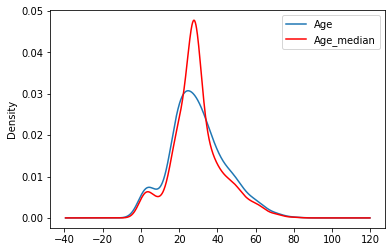

In [11]:

fig = plt.figure()
ax = fig.add_subplot(111)
df_med['Age'].plot(kind='kde', ax=ax)
df_med.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


Advantages And Disadvantages of Mean/Median Imputation
Advantages
*   Easy to implement(Robust to outliers)
*   Faster way to obtain the complete dataset 
**    Disadvantages
*   Change or Distortion in the original variance
*   Impacts Correlation

# Filling missing values with Random values

In [12]:
#df['Age'].sample()  # This might pick random rows of column age which might include rows with NaN values . to avoid this we use "dropna"
df['Age'].dropna().sample()

887    19.0
Name: Age, dtype: float64

In [13]:
df['Age'].dropna().sample(10) # its generating 10 random values from non null values of Age column

67     19.0
445     4.0
771    48.0
677    18.0
855    18.0
122    32.5
666    25.0
169    28.0
293    24.0
707    42.0
Name: Age, dtype: float64

In [14]:
df['Age'].isna().sum()

177

In [15]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) 
# since we have 177 null values so we need to generate 177 null values . 
# this line of code is  generating 177 random values from non null values of Age column

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [16]:
# now once we have got 177 random values from non-null values of Age column we need to plug-in these random values into Null records
## for this we need to find the index of missing records
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) 
random_sample.index=df[df['Age'].isnull()].index
random_sample.index  # Index of missing records

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [17]:
#   df.loc[df[variable].isnull(),variable+'_random']=random_sample ##  plugging-in 177 random values into Null records 
# but here we are not disturbing the original dataset .
# rather we will disturb the derived column 'Age_Random' column 
# so above code means whereever they find the null values in 'Age_random' column they will replace it with random sample records of 177

In [18]:
# check index for records having Null values 

df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [19]:
def impute_nan_random(df,variable):
    # df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable] # creating a copy of df[Age] and pasting in df['Age_random'] feature
    
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) 
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample  #whereever they find the null values in 'Age_random' column they will replace it with random sample records of 177
    

In [20]:
impute_nan_random(df_med,'Age')

In [21]:
df_med.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


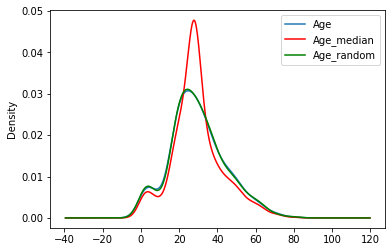

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_med['Age'].plot(kind='kde', ax=ax)
df_med.Age_median.plot(kind='kde', ax=ax, color='red')
df_med.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Advantages
* Easy To implement
* There is less distortion in variance

Disadvantage
* Every situation randomness wont work

Random sample imputation works well when the data are missing completely at random. 
But what about cases where data are not missing at random ? 

In that case " Capture NaN with a new feature"

# Capture NaN with a new feature

In [23]:
import numpy as np
df_med['Age_NAN']=np.where(df_med['Age'].isnull(),1,0)
# replace with wherever age is present,replace = 0
# replace with wherever age is not present(Null) = 1

In [24]:
# since we have now captured the importance of missingness in a fresh column where it marks record as 1 where Null while marks record as 0 where Not Null 


In [25]:
# now since we have a column of record of Null missingness. we can disturb the original dataset. 
impute_nan(df,'Age',df['Age'].median())

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0



Advantages
* Easy to implement
* Captures the importance of missing values

Disadvantages
*  Creating Additional Features(Curse of Dimensionality)

In [27]:
df_med.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random,Age_NAN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,0


# End of Distribution imputation¶

In [28]:
extreme=df['Age'].mean()+3*df['Age'].std()
extreme

73.27860964406095

In [29]:
def impute_nan_extreme(df,variable,extreme):
  df[variable+'_extreme']=df[variable].fillna(extreme)


In [30]:
impute_nan_extreme(df_med,'Age',extreme)

In [31]:
df_med.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random,Age_NAN,Age_extreme
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,0,35.0


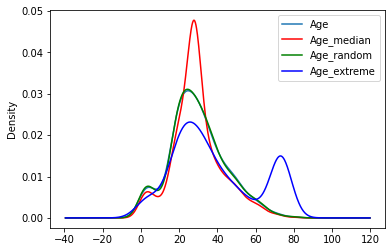

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_med['Age'].plot(kind='kde', ax=ax)
df_med.Age_median.plot(kind='kde', ax=ax, color='red')
df_med.Age_random.plot(kind='kde', ax=ax, color='green')
df_med.Age_extreme.plot(kind='kde', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

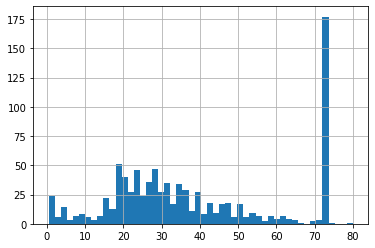

In [33]:
df_med['Age_extreme'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


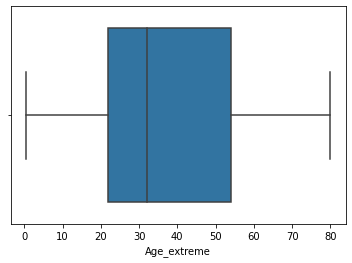

In [34]:
sns.boxplot('Age_extreme',data=df_med)

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable. The advantage is that it is quick and captures the importance of missing values (if one suspects the missing data is valuable). On the flipside, performing this action may distort the variable, mask predictive power if missingness is not important, hide true outliers if the missing data is large or create an unintended outlier if N/As are small.  Once again, this method should be performed on the training set and propagated on the test set. 

In [35]:
df_check=df_med.copy()

In [36]:
df_check['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [37]:
# Arbitrary vale imputation : 
# fillna(0) or fillna(100) or fillna(350) etc arbitrary values are usually taken more or less than the extreme end / outliers

## KNN imputation

In [38]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/titanic_train.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.drop([ 'PassengerId', 'Name', 
              'Ticket', 'Cabin'], axis=1,inplace=True)

In [41]:
cat_variables = df[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [42]:
df = df.drop(['Sex', 'Embarked'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [44]:
pd.DataFrame(df.corr())['Age']

Survived     -0.077221
Pclass       -0.369226
Age           1.000000
SibSp        -0.308247
Parch        -0.189119
Fare          0.096067
Sex_male      0.093254
Embarked_Q   -0.022405
Embarked_S   -0.032523
Name: Age, dtype: float64

In [45]:
# 3 features more correlated with Age column : Pclass,SibSp,Parch

df1=df[['Pclass','SibSp','Parch','Age']]

In [46]:
test_df_with_null=df1[df1['Age'].isnull()]
test_df_with_null

,Pclass,SibSp,Parch,Age
5,1.0,0.000,0.000000,NaN
17,0.5,0.000,0.000000,NaN
19,1.0,0.000,0.000000,NaN
26,1.0,0.000,0.000000,NaN
28,1.0,0.000,0.000000,NaN
...,...,...,...,...
859,1.0,0.000,0.000000,NaN
863,1.0,1.000,0.333333,NaN
868,1.0,0.000,0.000000,NaN
878,1.0,0.000,0.000000,NaN


In [47]:
ytest=test_df_with_null['Age']
xtest=test_df_with_null.drop(['Age'],axis=1)

In [48]:
train_df_without_null=df1.dropna()

In [49]:
train_df_without_null

,Pclass,SibSp,Parch,Age
0,1.0,0.125,0.000000,0.271174
1,0.0,0.125,0.000000,0.472229
2,1.0,0.000,0.000000,0.321438
3,0.0,0.125,0.000000,0.434531
4,1.0,0.000,0.000000,0.434531
...,...,...,...,...
885,1.0,0.000,0.833333,0.484795
886,0.5,0.000,0.000000,0.334004
887,0.0,0.000,0.000000,0.233476
889,0.0,0.000,0.000000,0.321438


In [50]:
ytrain=train_df_without_null['Age']
xtrain=train_df_without_null.drop(['Age'],axis=1)

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [52]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
ypred=lr.predict(xtest)

In [54]:
ypred

array([ 0.34283879,  0.41907556,  0.34283879,  0.34283879,  0.34283879,
        0.34283879,  0.44567927,  0.34283879,  0.34283879,  0.34283879,
        0.34283879,  0.29320573,  0.34283879,  0.24357268,  0.49531232,
        0.49531232,  0.27542989,  0.34283879,  0.34283879,  0.34283879,
        0.34283879,  0.34283879,  0.34283879,  0.34283879,  0.29320573,
        0.34283879,  0.34283879,  0.27542989,  0.3072871 ,  0.34283879,
        0.34283879, -0.08977734,  0.47753648,  0.49531232,  0.17616378,
       -0.08977734,  0.41907556,  0.49531232,  0.29320573,  0.34283879,
        0.34283879, -0.08977734,  0.29320573,  0.34283879,  0.17616378,
        0.34283879,  0.29320573,  0.29320573,  0.34283879,  0.49531232,
        0.34283879,  0.34283879,  0.49531232,  0.34283879,  0.41907556,
        0.49531232,  0.49531232,  0.49531232,  0.34283879,  0.24357268,
        0.41907556,  0.34283879,  0.49531232, -0.08977734,  0.24357268,
        0.44567927,  0.34283879,  0.29320573,  0.49531232,  0.34

In [55]:
df.loc[df.Age.isnull(),'Age']=ypred

In [56]:
df['Age'].head(10)

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
5    0.342839
6    0.673285
7    0.019854
8    0.334004
9    0.170646
Name: Age, dtype: float64

In [57]:
df['Age'].isna().sum()

0

In [58]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0


In [59]:
df_knn=df_old.copy()

In [60]:
df_knn.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
df_knn.drop([ 'PassengerId', 'Name', 
              'Ticket', 'Cabin'], axis=1,inplace=True)

In [62]:
df_knn.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [63]:
cat_variables = df_knn[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [64]:
df_knn = df_knn.drop(['Sex', 'Embarked'], axis=1)
df_knn = pd.concat([df_knn, cat_dummies], axis=1)
df_knn.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)
df_knn.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [66]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)


In [67]:
df_knn['Age']

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888    0.273687
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

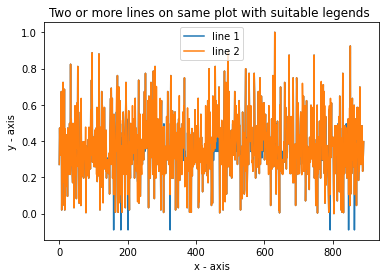

In [68]:
# line 1 points
# x1 = [10,20,30]
x1=df['Age']
# plotting the line 1 points 
plt.plot(x1, label = "line 1")
# line 2 points
# x2 = [20,30,40]
x2=df_knn['Age']
# plotting the line 2 points 
plt.plot(x2, label = "line 2")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [69]:
df_test=pd.DataFrame()

In [70]:
df_test['LR']=df['Age']
df_test['KNN']=df_knn['Age']

In [71]:
df_test[df_test['LR']!=df_test['KNN']]

,LR,KNN
5,0.342839,0.595376
17,0.419076,0.467203
19,0.342839,0.148027
26,0.342839,0.406886
28,0.342839,0.215883
...,...,...
859,0.342839,0.318924
863,-0.089777,0.105303
868,0.342839,0.308872
878,0.342839,0.301332


In [72]:
df_test['LR'].mean()

0.36280406153208294

In [73]:
df_test['KNN'].mean()

0.36961328117397496

In [74]:
df_test['original']=df_old['Age']

In [75]:
df_test.to_csv('check.csv')

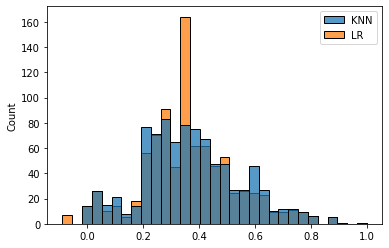

In [76]:
sns.histplot(data=df_test[['KNN','LR']])

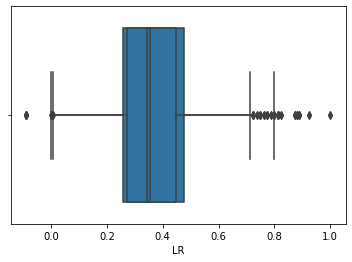

In [77]:
sns.boxplot(data=df_test,x='KNN')
sns.boxplot(data=df_test,x='LR')

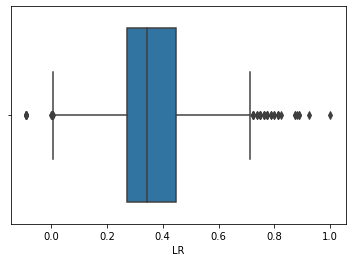

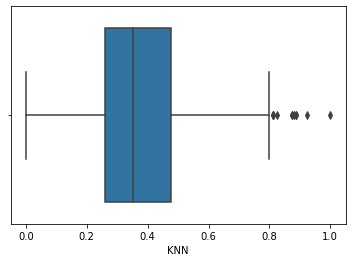

In [78]:
# Create data and labels first
# df_test[['LR','KNN']]

# Plot data and labels
sns.boxplot(data=df_test,x='LR')
plt.show()
sns.boxplot(data=df_test,x='KNN')


In [79]:
df_test[['LR','KNN']].describe()

,LR,KNN
count,891.000000,891.000000
mean,0.362804,0.369613
std,0.171089,0.177302
min,-0.089777,0.000000
25%,0.271174,0.258608
50%,0.342839,0.352852
75%,0.447097,0.477256
max,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


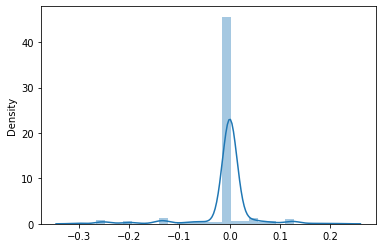

In [80]:
import seaborn as sns
sns.distplot(df_test['LR']-df_test['KNN'])

Above graph shows that the difference between prediction using KNN and predictions using LR is min and their distributions show normal distribution with closed range (-0.2to +0.2)

# Categorical Data Imputation

## Frequent Category Imputation¶


In [81]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/house_prices_train.csv')

In [82]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/house_prices_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])


In [83]:
df.head(2)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500



**Compute the frequency with every feature**

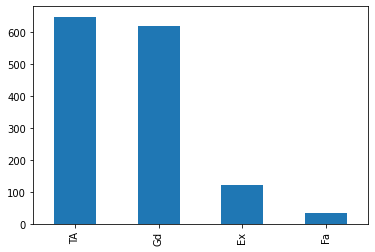

In [84]:
df['BsmtQual'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


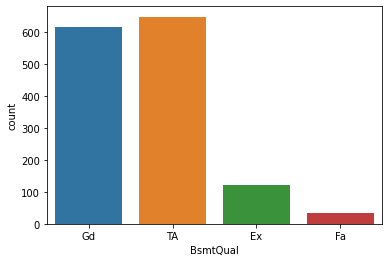

In [85]:
sns.countplot(df['BsmtQual'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


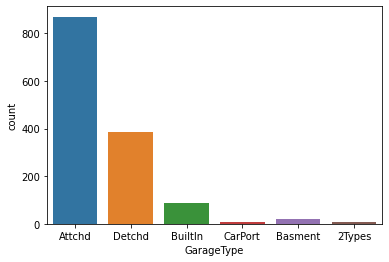

In [86]:
sns.countplot(df['GarageType'])

In [87]:
# most_frequent_cat=
df['GarageType'].value_counts().index[0]

'Attchd'

In [88]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [89]:
df['GarageType'].value_counts().sort_values(ascending=False).head(1)

Attchd    870
Name: GarageType, dtype: int64

In [90]:
df['GarageType'].mode()[0]

'Attchd'

In [91]:
most_frequent_category=df['FireplaceQu'].mode()[0]

In [92]:
def impute_nan_freq_cat(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable+'_frequent_Cat']=df[variable].fillna(most_frequent_category)

In [93]:
impute_nan_freq_cat(df,'FireplaceQu')

In [94]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_frequent_Cat
0,Gd,NaN,Attchd,208500,Gd
1,Gd,TA,Attchd,181500,TA
2,Gd,TA,Attchd,223500,TA
3,TA,Gd,Detchd,140000,Gd
4,Gd,TA,Attchd,250000,TA


Adding Flags.new column for null value indicator 

In [95]:
# df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)

One Hot encoding

In [96]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/titanic_train.csv',usecols=['Sex'])

In [97]:
df.head(2)

,Sex
0,male
1,female


In [98]:
pd.get_dummies(data=df).head() # Female comes first as F comes before m

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [99]:
pd.get_dummies(data=df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [100]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/mercedez.csv',usecols=['X0','X1','X2','X3','X4','X5','X6',])

In [101]:
df.head(2)

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l


In [102]:
df['X0'].value_counts().sort_values(ascending=False).head(1)

z    360
Name: X0, dtype: int64

In [103]:
df['X0'].value_counts().sort_values(ascending=False)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
i      18
am     18
u      17
aw     16
l      16
ad     14
k      11
b      11
au     11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
ab      1
g       1
Name: X0, dtype: int64

so in above case , when we have many categories so we can just take the top 10 frequently occuring categories and drop the remaining ones 


In [104]:
lst_10=df['X0'].value_counts().sort_values(ascending=False).head(10).index
lst_10 # list of top 10 categories 

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [105]:

dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
dictionary

{'Friday': 5,
 'Monday': 1,
 'Saturday': 6,
 'Sunday': 7,
 'Thursday': 4,
 'Tuesday': 2,
 'Wednesday': 3}

In [106]:
lst=['Monday','Thursday','Friday','Tuesday','Wednesday','Thursday','Friday','Saturday','Thursday','Friday','Sunday']
df=pd.DataFrame()
df['weekday']=lst

In [107]:
df['weekday_ordinal']=df['weekday'].map(dictionary)
df

,weekday,weekday_ordinal
0,Monday,1
1,Thursday,4
2,Friday,5
3,Tuesday,2
4,Wednesday,3
5,Thursday,4
6,Friday,5
7,Saturday,6
8,Thursday,4
9,Friday,5


In [108]:
df['weekday'].map(dictionary)

0     1
1     4
2     5
3     2
4     3
5     4
6     5
7     6
8     4
9     5
10    7
Name: weekday, dtype: int64

In [3]:
import pandas as pd
import numpy as np


In [5]:
train_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,index_col=None) 
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train_set[1].nunique()

9

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
catg_df=train_set.select_dtypes(exclude=["number","bool_"])
catg_df.head()

,1,3,5,6,7,8,9,13,14
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [9]:
num_df=train_set.select_dtypes(exclude=["bool_","object_"])
num_df.head()

,0,2,4,10,11,12
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Frequency imputation: replacing columns with its corresponding frequency 


In [10]:
catg_df.columns=['Employment','Degree','Status','Designation','family_job','race','sex','Country','salary']

In [11]:
catg_df.head()

,Employment,Degree,Status,Designation,family_job,race,sex,Country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [12]:
for col in catg_df:
  print(col,':',catg_df[col].nunique(),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
race : 5 labels
sex : 2 labels
Country : 42 labels
salary : 2 labels


In [13]:
country_dict=catg_df['Country'].value_counts().to_dict()

In [14]:
catg_df['Country_dict_map_freq']=catg_df['Country'].map(country_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
catg_df.head(10)

,Employment,Degree,Status,Designation,family_job,race,sex,Country,salary,Country_dict_map_freq
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K,29170



Target Guided Ordinal Encoding
*  Ordering the labels according to the target
*  Replace the labels by the joint probability of being 1 or 0

In [59]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/titanic_train.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


# link : Live-Feature Engineering-All Techniques To Handle Missing Values- Day 4
## https://www.youtube.com/watch?v=uWD-r7GZppg

In [60]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [61]:
df['Cabin'].fillna('Missing',inplace=True)

In [62]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [63]:
cabin_abbvr=[]
for i in df['Cabin']:
  cabin_abbvr.append(i[0])


In [64]:
df['cabin_abbvr']=cabin_abbvr
df.head()

,Survived,Cabin,cabin_abbvr
0,0,Missing,M
1,1,C85,C
2,1,Missing,M
3,1,C123,C
4,0,Missing,M


In [65]:
df['cabin_abbvr'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [66]:
df.groupby(['cabin_abbvr'])['Survived'].mean()
# It shows probability of a person surviving when belonging to cabin A,B,C.... respectively.

cabin_abbvr
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [67]:
df.groupby(['cabin_abbvr'])['Survived'].mean().sort_values().index
# gives the cabins for which survival rate is max

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='cabin_abbvr')

In [68]:
ordinal_labels=df.groupby(['cabin_abbvr'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='cabin_abbvr')

In [69]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2 # Based  on Frequency we are giving ranks 

{'A': 2, 'B': 6, 'C': 4, 'D': 8, 'E': 7, 'F': 5, 'G': 3, 'M': 1, 'T': 0}

In [70]:
df['Cabin_ordinal_labels']=df['cabin_abbvr'].map(ordinal_labels2)
df.head()

,Survived,Cabin,cabin_abbvr,Cabin_ordinal_labels
0,0,Missing,M,1
1,1,C85,C,4
2,1,Missing,M,1
3,1,C123,C,4
4,0,Missing,M,1


## Mean Encoding

In [74]:
mean_ordinal=df.groupby(['cabin_abbvr'])['Survived'].mean().to_dict()

In [76]:
df['mean_ordinal']=df['cabin_abbvr'].map(mean_ordinal)


In [77]:
df.head(10)

,Survived,Cabin,cabin_abbvr,Cabin_ordinal_labels,mean_ordinal
0,0,Missing,M,1,0.299854
1,1,C85,C,4,0.593220
2,1,Missing,M,1,0.299854
3,1,C123,C,4,0.593220
4,0,Missing,M,1,0.299854
5,0,Missing,M,1,0.299854
6,0,E46,E,7,0.750000
7,0,Missing,M,1,0.299854
8,1,Missing,M,1,0.299854
9,1,Missing,M,1,0.299854


In [72]:
str1=[]
for i in df['Cabin']:
  str1.append(i[0])


In [73]:
df.head(2)

,Survived,Cabin,cabin_abbvr,Cabin_ordinal_labels
0,0,Missing,M,1
1,1,C85,C,4
